In [6]:
# import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# define folder paths
ANALYSIS_PATH = "./data_analysis/"

In [11]:
def patient_count(master_file): # analyze unique patients per year (Reference Key)
    if not os.path.exists(master_file):
        print(f"File {master_file} does not exist.")
        return
    
    try:
        df = pd.read_csv(master_file)
        if 'Reference Key' in df.columns and 'Year' in df.columns:
            grouped_df = df.groupby('Year')['Reference Key'].nunique().reset_index(name='Unique_Patients')
    except Exception as e:
        print(f"Error reading {master_file}: {e}")
        return
    
    if grouped_df.empty:
        print("No data available to plot.")
        return

    plt.figure(figsize=(12, 8)) # plot unique patients per year
    years = grouped_df['Year']
    unique_patients = grouped_df['Unique_Patients']
    bars = plt.bar(range(len(years)), unique_patients, alpha=1, color='lightgreen', edgecolor='darkgreen', linewidth=0.5, zorder=2)
    plt.xlabel('Year')
    plt.ylabel('Number of Unique Patients')
    plt.title('Unique Patients per Year (Reference Key)')
    plt.xticks(range(len(years)), years, rotation=45)
    plt.grid(True, alpha=0.3, zorder=1)
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.savefig(os.path.join(ANALYSIS_PATH, 'unique_patients_per_year.png'), dpi=150, bbox_inches='tight') # save plot
    plt.show()
    print(f"Plot saved to {os.path.join(ANALYSIS_PATH, 'unique_patients_per_year.png')}")
    output_file = os.path.join(ANALYSIS_PATH, 'unique_patients_per_year.csv')
    grouped_df.to_csv(output_file, index=False) # save csv
    print(f"Unique patient counts saved to {output_file}")


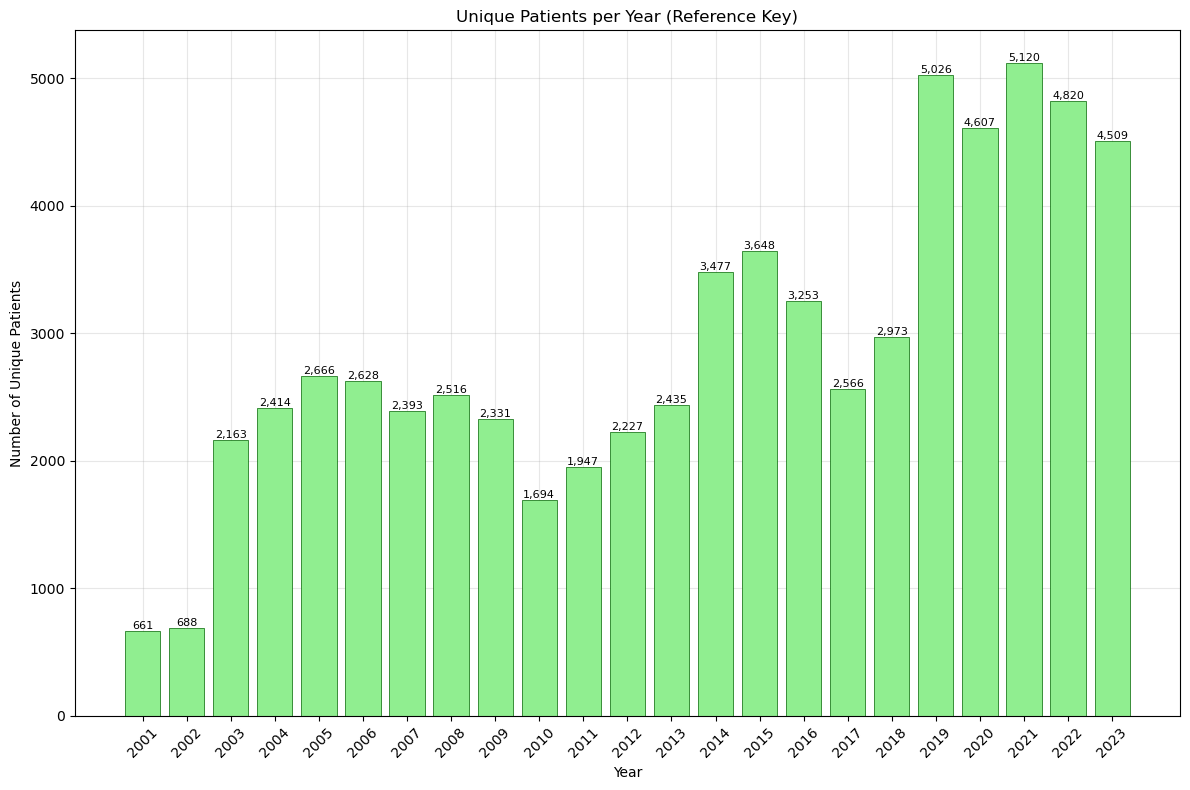

Plot saved to ./data_analysis/unique_patients_per_year.png
Unique patient counts saved to ./data_analysis/unique_patients_per_year.csv


In [12]:
patient_count("./Sepsis_plt/plt_year/plt/plt_SIC_all.csv") # specify master file to count